# GGS Data Visualization
Author: Matthew Learn (matt.learn@marine.rutgers.edu)<br><br>
Jupyter Notebook meant for visualizing Glider Guidance System (GGS) products.

In [1]:
from models import *
from functions import *
from pathfinding import *
from plotting import *

2025-01-08 20:06:00.135 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [2]:
dates = ('2025-01-01', '2025-01-01')
depth = 1000
lon_min = -79
lon_max = -63
lat_min = 34
lat_max = 45

# lon_min = -80
# lon_max = -70
# lat_min = 34
# lat_max = 42

extent = (lat_min, lon_min, lat_max, lon_max)

density = 5
scalar = 4

Load and process data.

In [3]:
# Load and preprocess ESPC data

espc = ESPC()
espc.load()
espc.subset(dates, extent, depth)
espc.subset_data = espc.subset_data.isel(time=0)
espc.z_interpolated_data = interpolate_depth(espc)
espc.z_interpolated_data = calculate_magnitude(espc)
espc.da_data = depth_average(espc)

Loading ESPC data...
Start time (UTC): 2025-01-08 20:06:00.153056+00:00
Done.
End time (UTC): 2025-01-08 20:06:00.650675+00:00
Runtime: 0:00:00.497619

ESPC: Subsetted data.

ESPC: Interpolating depth...
Start time (UTC): 2025-01-08 20:06:00.705990+00:00
Done.
End time (UTC): 2025-01-08 20:06:07.419132+00:00
Runtime: 0:00:06.713142

ESPC: Calculating magnitude...
Start time (UTC): 2025-01-08 20:06:07.419132+00:00
Done.
End time (UTC): 2025-01-08 20:06:07.428475+00:00
Runtime: 0:00:00.009343

ESPC: Depth averaging...
Start time (UTC): 2025-01-08 20:06:07.428475+00:00
Done.
End time (UTC): 2025-01-08 20:06:07.432493+00:00
Runtime: 0:00:00.004018



In [4]:
# Load and preprocess RTOFS data

rtofs = RTOFS()
rtofs.load('east')
rtofs.subset(dates, extent, depth)
rtofs.subset_data = rtofs.subset_data.isel(time=0)
rtofs.z_interpolated_data = interpolate_depth(rtofs)
rtofs.z_interpolated_data = calculate_magnitude(rtofs)
rtofs.da_data = depth_average(rtofs)

Loading RTOFS data...
Start time (UTC): 2025-01-08 20:06:07.441783+00:00
Model source: RTOFS (East Coast)
Done.
End time (UTC): 2025-01-08 20:06:31.383602+00:00
Runtime: 0:00:23.941819

RTOFS (East Coast): Subsetted data.

RTOFS (East Coast): Interpolating depth...
Start time (UTC): 2025-01-08 20:06:34.378804+00:00
Done.
End time (UTC): 2025-01-08 20:06:39.424080+00:00
Runtime: 0:00:05.045276

RTOFS (East Coast): Calculating magnitude...
Start time (UTC): 2025-01-08 20:06:39.424080+00:00
Done.
End time (UTC): 2025-01-08 20:06:39.430410+00:00
Runtime: 0:00:00.006330

RTOFS (East Coast): Depth averaging...
Start time (UTC): 2025-01-08 20:06:39.430410+00:00
Done.
End time (UTC): 2025-01-08 20:06:39.435710+00:00
Runtime: 0:00:00.005300



In [5]:
rmsd = calculate_rmsd(rtofs.z_interpolated_data, espc.z_interpolated_data, regrid=True)

RTOFS (East Coast) & ESPC: Calculating RMSD...
Start time (UTC): 2025-01-08 20:06:39.443456+00:00
RTOFS (East Coast): Regridding to ESPC...
Start time (UTC): 2025-01-08 20:06:39.443456+00:00
Done.
End time (UTC): 2025-01-08 20:06:43.687224+00:00
Runtime: 0:00:04.243768
Done.
End time (UTC): 2025-01-08 20:06:43.696860+00:00
Runtime: 0:00:04.253404



2025-01-08 20:06:43.706 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-01-08 20:06:43.707 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 20:06:44.479 
  command:

    streamlit run c:\Users\matth\miniconda3\envs\ggs01\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-08 20:06:44.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 20:06:44.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 20:06:44.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 20:06:44.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Saving figure to figures\2025010100_ESPC_threshold_streamplot.png
Saved.
Saving figure to figures\2025010100_RTOFS-east_threshold_streamplot.png
Saved.
Saving figure to figures\2025010100_ESPC+RTOFS-east_rmsd_None.png
Saved.


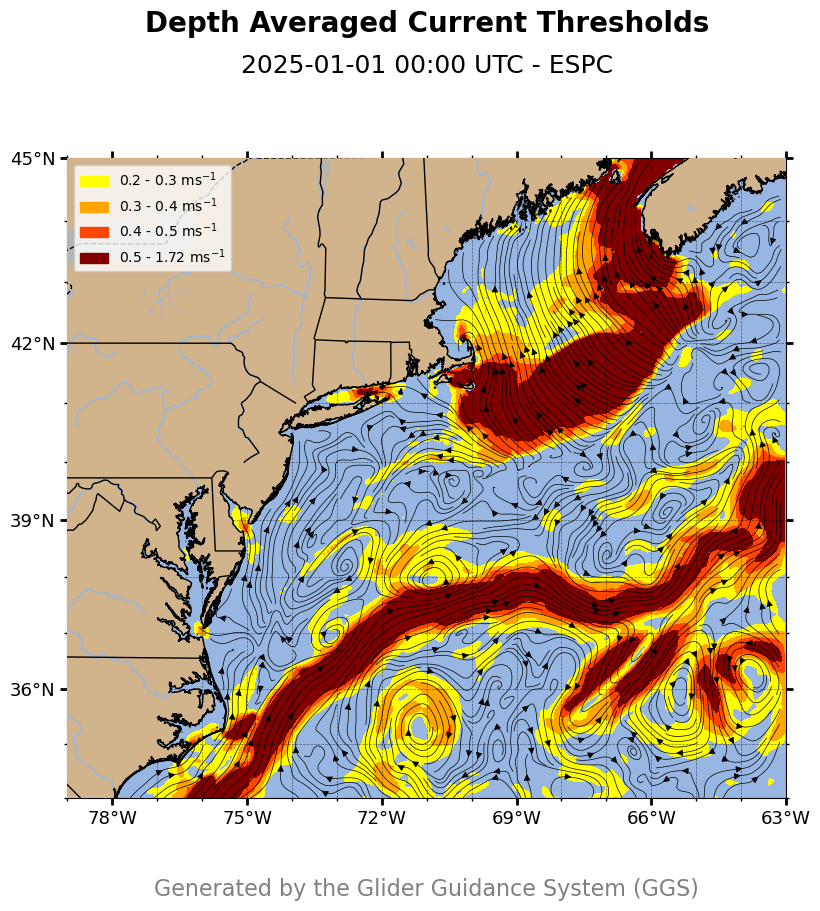

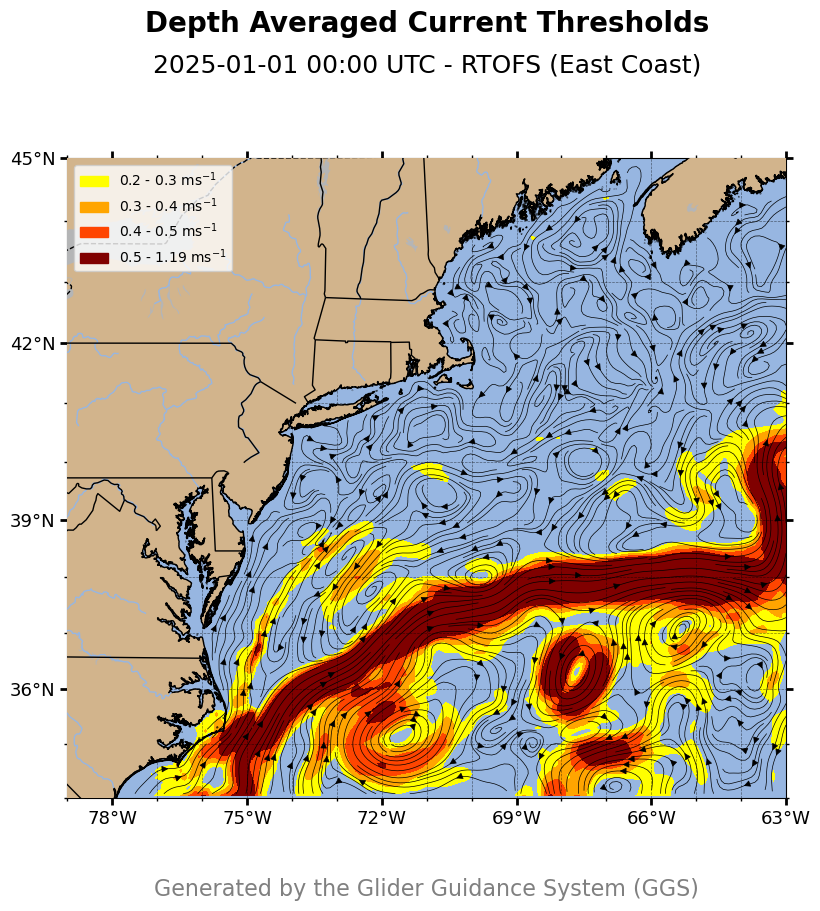

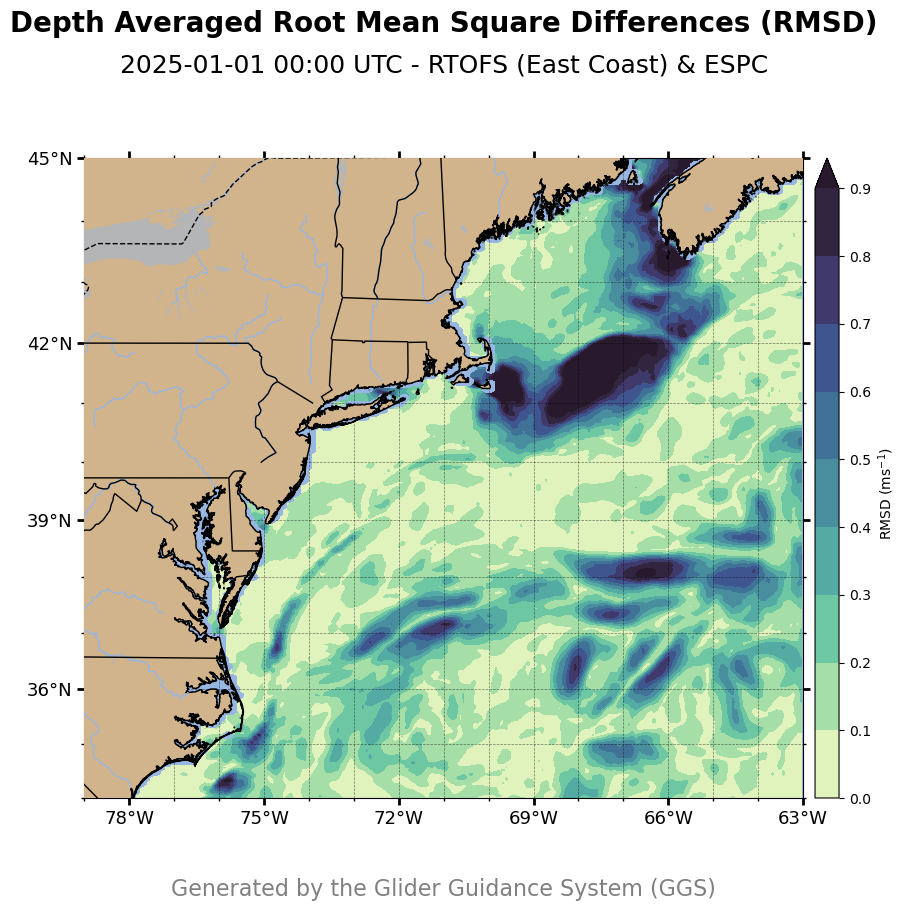

In [6]:
fig, contourf, legend, cax, quiver, streamplot = create_map(espc.da_data, extent, 'threshold', 'streamplot', density=5, initialize=True, save=True)
fig, contourf, legend, cax, quiver, streamplot = create_map(rtofs.da_data, extent, 'threshold', 'streamplot', density=5, initialize=True, save=True)
fig, contourf, legend, cax, quiver, streamplot = create_map(rmsd, extent, 'rmsd', None, density=5, initialize=True, save=True)